In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
heart_data= pd.read_csv(r"C:\De Montfort University\PROJECT\PRO\heart.csv")

In [3]:
heart_data_new= pd.read_csv(r"C:\De Montfort University\PROJECT\PRO\data.csv")

In [4]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_data.shape

(303, 14)

In [7]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


No null values are found.No further cleaning is required

## Exploratory Data analysis

### EDA on age

In [9]:
print(heart_data['age'].max())
print(heart_data['age'].min())

77
29


In [10]:
heart_data['level_of_age'] = pd.cut(heart_data['age'], [25,35,45,55,65,75,85], labels=['25-35', '35-45', '45-55', '55-65', '65-75', '75-85'])

In [11]:
heart_data.groupby([heart_data["level_of_age"],heart_data['output']]).count()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  \
level_of_age output                                                             
25-35        0         2    2   2       2     2    2        2         2     2   
             1         5    5   5       5     5    5        5         5     5   
35-45        0        14   14  14      14    14   14       14        14    14   
             1        43   43  43      43    43   43       43        43    43   
45-55        0        33   33  33      33    33   33       33        33    33   
             1        55   55  55      55    55   55       55        55    55   
55-65        0        73   73  73      73    73   73       73        73    73   
             1        45   45  45      45    45   45       45        45    45   
65-75        0        15   15  15      15    15   15       15        15    15   
             1        16   16  16      16    16   16       16        16    16   
75-85        0         1    1   1       1     1    1        1         1     1   
             1         1    1   1       1     1    1        1         1     1   

                     oldpeak  slp  caa  thall  
level_of_age output                            
25-35        0             2    2    2      2  
             1             5    5    5      5  
35-45        0            14   14   14     14  
             1            43   43   43     43  
45-55        0            33   33   33     33  
             1            55   55   55     55  
55-65        0            73   73   73     73  
             1            45   45   45     45  
65-75        0            15   15   15     15  
             1            16   16   16     16  
75-85        0             1    1    1      1  
             1             1    1    1      1

In [12]:
heart_data=heart_data.rename(columns={'output':'num'})

In [13]:
heart_data['level_of_age'].value_counts()

55-65    118
45-55     88
35-45     57
65-75     31
25-35      7
75-85      2
Name: level_of_age, dtype: int64

### Visualisation on age

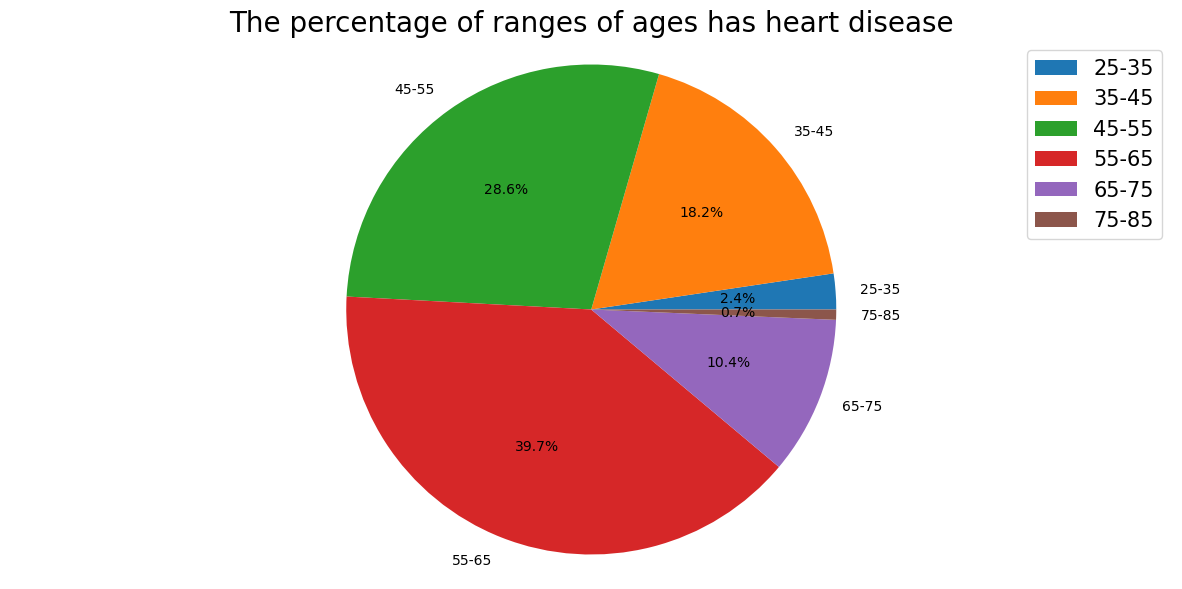

In [14]:
plt.figure(figsize=(15,7))

# Data to plot
labels = '25-35', '35-45', '45-55', '55-65', '65-75', '75-85'
sizes = [7,54,85,118,31,2]

 
# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.title('The percentage of ranges of ages has heart disease',fontsize=20)
plt.legend(('25-35', '35-45', '45-55', '55-65', '65-75', '75-85'),fontsize=15)
plt.axis('equal')
plt.show()

The people with and with no heart disease between the ages 55-65 has the highest percentage of 39.7%.
The people with and with no heart disease between the ages 75-85 has the lowest percentage of 0.7%.

In [15]:
#ranges of ages with heart disease without level 0
print(len(heart_data[(heart_data['level_of_age'] == '25-35') & (heart_data['num'] == 1)])+
len(heart_data[(heart_data['level_of_age'] == '25-35') & (heart_data['num'] == 2)])+
len(heart_data[(heart_data['level_of_age'] == '25-35') & (heart_data['num'] == 3)])+
      len(heart_data[(heart_data['level_of_age'] == '25-35') & (heart_data['num'] == 4)]),'\n')
#25-35 2
print(len(heart_data[(heart_data['level_of_age'] == '35-45') & (heart_data['num'] == 1)])+
len(heart_data[(heart_data['level_of_age'] == '35-45') & (heart_data['num'] == 2)])+
len(heart_data[(heart_data['level_of_age'] == '35-45') & (heart_data['num'] == 3)])+
len(heart_data[(heart_data['level_of_age'] == '35-45') & (heart_data['num'] == 4)]),'\n')
#35-45 13
print(len(heart_data[(heart_data['level_of_age'] == '45-55') & (heart_data['num'] == 1)])+
len(heart_data[(heart_data['level_of_age'] == '45-55') & (heart_data['num'] == 2)])+
len(heart_data[(heart_data['level_of_age'] == '45-55') & (heart_data['num'] == 3)])+
len(heart_data[(heart_data['level_of_age'] == '45-55') & (heart_data['num'] == 4)]),'\n')
#45-55 32
print(len(heart_data[(heart_data['level_of_age'] == '55-65') & (heart_data['num'] == 1)])+
len(heart_data[(heart_data['level_of_age'] == '55-65') & (heart_data['num'] == 2)])+
len(heart_data[(heart_data['level_of_age'] == '55-65') & (heart_data['num'] == 3)])+
len(heart_data[(heart_data['level_of_age'] == '55-65') & (heart_data['num'] == 4)]),'\n')
# 74
print(len(heart_data[(heart_data['level_of_age'] == '65-75') & (heart_data['num'] == 1)])+
len(heart_data[(heart_data['level_of_age'] == '65-75') & (heart_data['num'] == 2)])+
len(heart_data[(heart_data['level_of_age'] == '65-75') & (heart_data['num'] == 3)])+
len(heart_data[(heart_data['level_of_age'] == '65-75') & (heart_data['num'] == 4)]),'\n')
#15
print(len(heart_data[(heart_data['level_of_age'] == '75-85') & (heart_data['num'] == 1)])+
len(heart_data[(heart_data['level_of_age'] == '75-85') & (heart_data['num'] == 2)])+
len(heart_data[(heart_data['level_of_age'] == '75-85') & (heart_data['num'] == 3)])+
len(heart_data[(heart_data['level_of_age'] == '75-85') & (heart_data['num'] == 4)]))

5 

43 

55 

45 

16 

1


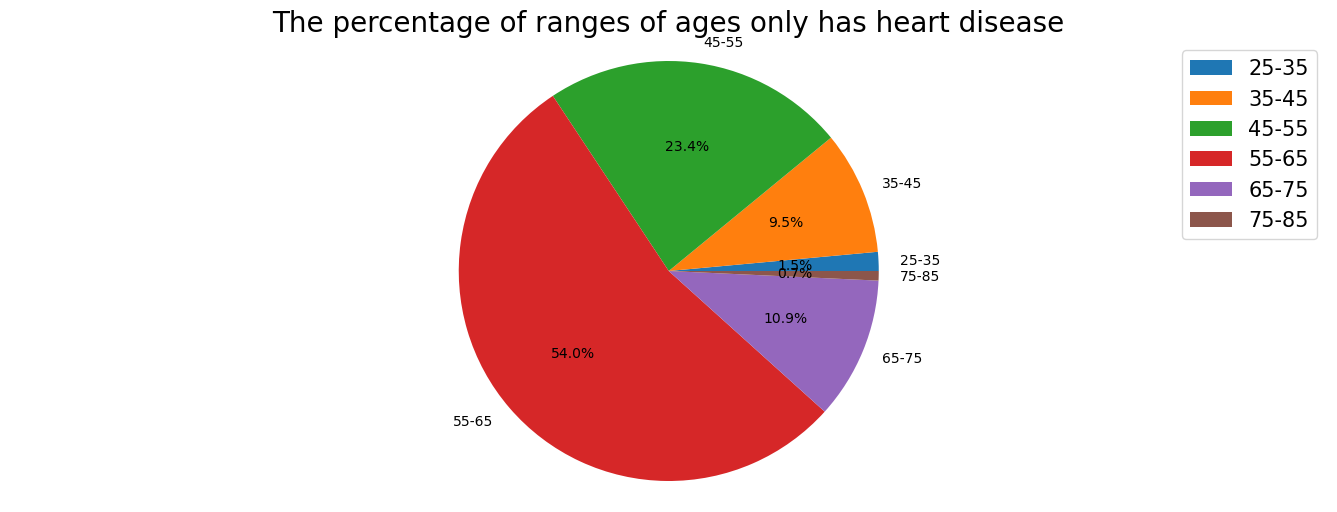

In [16]:
plt.figure(figsize=(17,6))

# Data to plot
labels = '25-35', '35-45', '45-55', '55-65', '65-75', '75-85'
sizes = [2,13,32,74,15,1]
#colors = ['blue', 'red']
#explode = (0.1, 0 )  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.title('The percentage of ranges of ages only has heart disease',fontsize=20)
plt.legend(('25-35', '35-45', '45-55', '55-65', '65-75', '75-85'),fontsize=15)

plt.axis('equal')
plt.show()

The people with heart disease between the ages 55-65 has the highest percentage of 54%.
The people with heart disease between the ages 75-85 has the lowest percentage of 0.7%.

So we consider the age group 55-65

In [17]:
print(len(heart_data[(heart_data['level_of_age'] == '55-65') & (heart_data['num'] == 0)]))
print(len(heart_data[(heart_data['level_of_age'] == '55-65') & (heart_data['num'] == 1)]))
print(len(heart_data[(heart_data['level_of_age'] == '55-65') & (heart_data['num'] == 2)]))
print(len(heart_data[(heart_data['level_of_age'] == '55-65') & (heart_data['num'] == 3)]))
print(len(heart_data[(heart_data['level_of_age'] == '55-65') & (heart_data['num'] == 4)]))

73
45
0
0
0


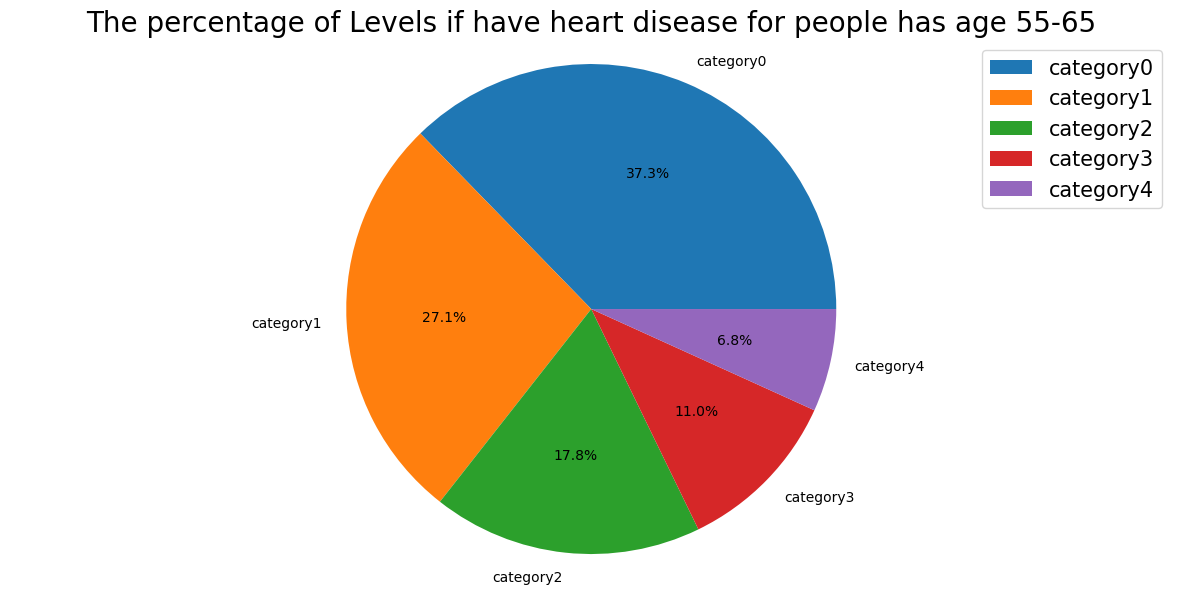

In [18]:
plt.figure(figsize=(15,7))

# Data to plot
labels = 'category0', 'category1', 'category2', 'category3', 'category4'
sizes = [44,32,21,13,8]
 
# Plot
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.title('The percentage of Levels if have heart disease for people has age 55-65',fontsize=20)
plt.legend(('category0', 'category1', 'category2', 'category3', 'category4'),fontsize=15)
plt.axis('equal')
plt.show()

### EDA on sex

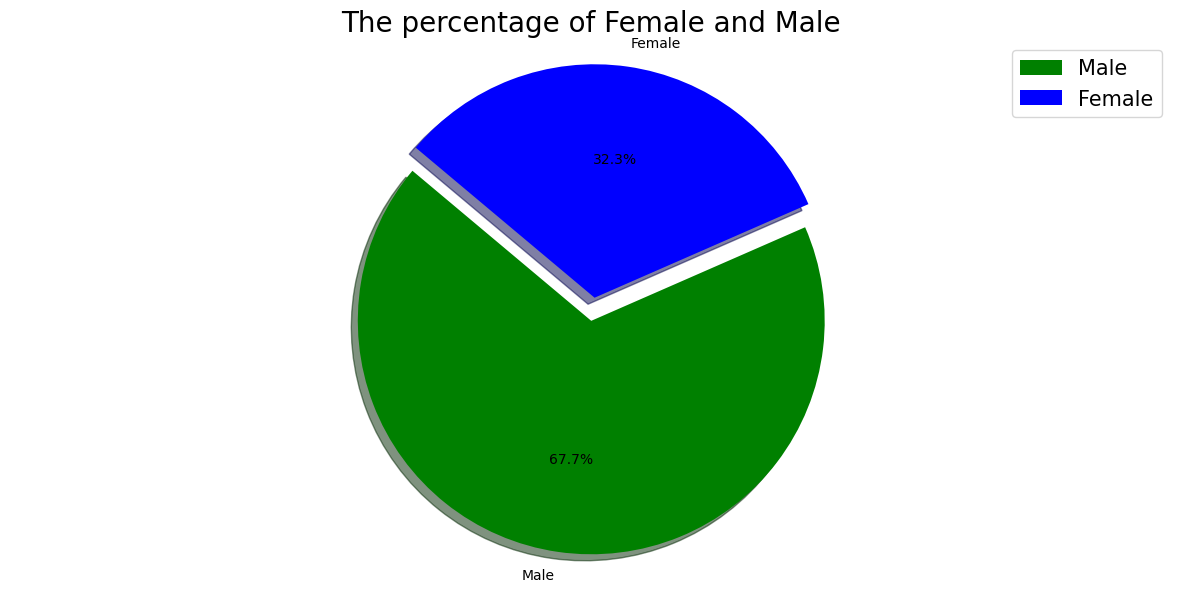

In [19]:
plt.figure(figsize=(15,7))
 
# Data to plot
labels = 'Male', 'Female'
sizes = [201,96]
colors = ['green', 'blue']
explode = (0.1, 0 )  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('The percentage of Female and Male',fontsize=20)
plt.legend(('Male', 'Female'),fontsize=15)
plt.axis('equal')
plt.show()

In [20]:
heart_data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [21]:
heart_data['num'].value_counts()

1    165
0    138
Name: num, dtype: int64

1 is male and 0 is female

num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

In [22]:
print(len(heart_data[(heart_data['num'] == 0) & (heart_data['sex'] == 1)]))
print(len(heart_data[(heart_data['num'] == 1) & (heart_data['sex'] == 1)]))
print(len(heart_data[(heart_data['num'] == 2) & (heart_data['sex'] == 1)]))
print(len(heart_data[(heart_data['num'] == 3) & (heart_data['sex'] == 1)]))
print(len(heart_data[(heart_data['num'] == 4) & (heart_data['sex'] == 1)]))

114
93
0
0
0


In [23]:
#female
print(len(heart_data[(heart_data['num'] == 0) & (heart_data['sex'] == 0)]))
print(len(heart_data[(heart_data['num'] == 1) & (heart_data['sex'] == 0)]))
print(len(heart_data[(heart_data['num'] == 2) & (heart_data['sex'] == 0)]))
print(len(heart_data[(heart_data['num'] == 3) & (heart_data['sex'] == 0)]))
print(len(heart_data[(heart_data['num'] == 4) & (heart_data['sex'] == 0)]))

24
72
0
0
0


For plotting bar graph we can group the gender

In [24]:
heart_data.groupby([heart_data['sex'],heart_data['num']]).count()

age   cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
sex num                                                                       
0   0     24   24      24    24   24       24        24    24       24   24   
    1     72   72      72    72   72       72        72    72       72   72   
1   0    114  114     114   114  114      114       114   114      114  114   
    1     93   93      93    93   93       93        93    93       93   93   

         caa  thall  level_of_age  
sex num                            
0   0     24     24            24  
    1     72     72            72  
1   0    114    114           114  
    1     93     93            93

Here we get the means for female as 71,9,7,7,2 and means for male as 89,45,28,28,11

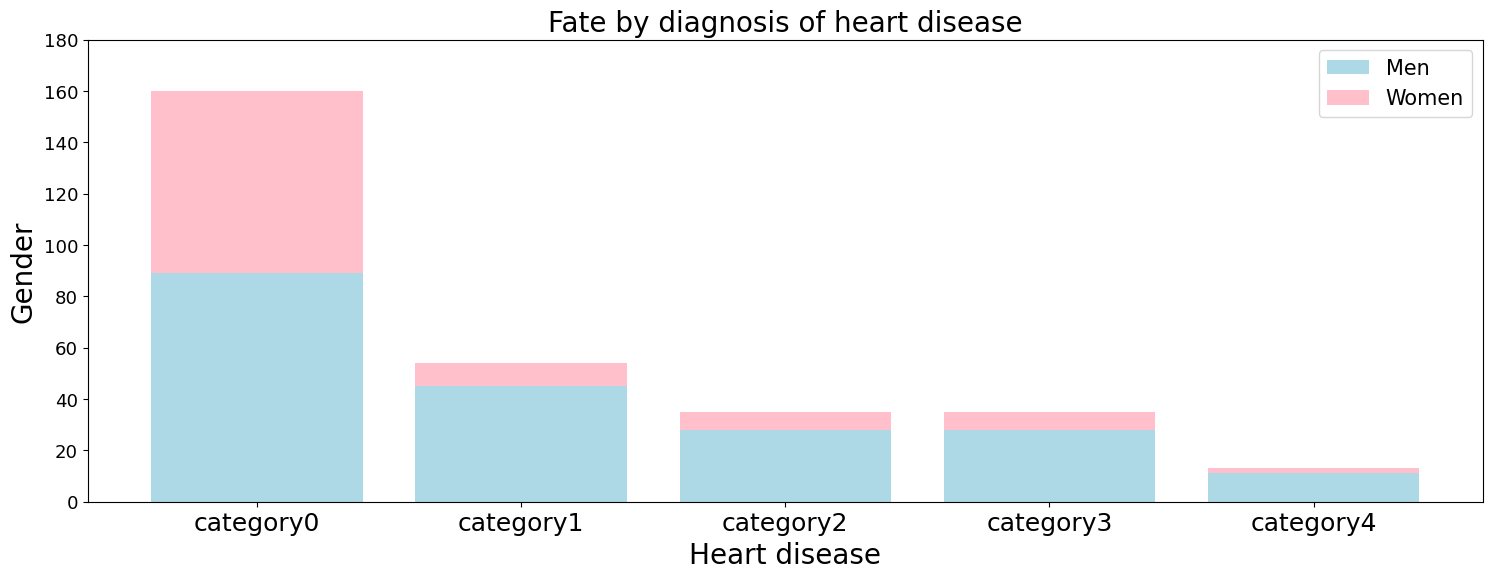

In [25]:
import numpy as np
plt.figure(figsize=(18,6))
means1 = (89,45,28,28,11)
means0 = (71,9,7,7,2)

p1 = plt.bar(np.arange(5), means1,color='lightblue')
p2 = plt.bar(np.arange(5), means0,color='pink', bottom=means1)

plt.xlabel('Heart disease',fontsize=20)
plt.ylabel('Gender',fontsize=20)

plt.title('Fate by diagnosis of heart disease',fontsize=20)
plt.xticks(np.arange(5) , ('category0', 'category1', 'category2', 'category3', 'category4'),fontsize=18)
plt.yticks(np.arange(0, 200, 20),fontsize=13)
plt.legend((p1[0], p2[0]), ('Men', 'Women'),fontsize=15)

plt.show()

In [26]:
print(heart_data['chol'].unique().max())
print(heart_data['chol'].unique().min())

564
126


### EDA on chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic


In [27]:
heart_data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [28]:
print(len(heart_data[(heart_data['num'] == 0) & (heart_data['cp'] == 1)]))
print(len(heart_data[(heart_data['num'] == 1) & (heart_data['cp'] == 1)]))
print(len(heart_data[(heart_data['num'] == 2) & (heart_data['cp'] == 1)]))
print(len(heart_data[(heart_data['num'] == 3) & (heart_data['cp'] == 1)]))
print(len(heart_data[(heart_data['num'] == 4) & (heart_data['cp'] == 1)]),'\n')
#
print(len(heart_data[(heart_data['num'] == 0) & (heart_data['cp'] == 2)]))
print(len(heart_data[(heart_data['num'] == 1) & (heart_data['cp'] == 2)]))
print(len(heart_data[(heart_data['num'] == 2) & (heart_data['cp'] == 2)]))
print(len(heart_data[(heart_data['num'] == 3) & (heart_data['cp'] == 2)]))
print(len(heart_data[(heart_data['num'] == 4) & (heart_data['cp'] == 2)]),'\n')

print(len(heart_data[(heart_data['num'] == 0) & (heart_data['cp'] == 3)]))
print(len(heart_data[(heart_data['num'] == 1) & (heart_data['cp'] == 3)]))
print(len(heart_data[(heart_data['num'] == 2) & (heart_data['cp'] == 3)]))
print(len(heart_data[(heart_data['num'] == 3) & (heart_data['cp'] == 3)]))
print(len(heart_data[(heart_data['num'] == 4) & (heart_data['cp'] == 3)]),'\n')

print(len(heart_data[(heart_data['num'] == 0) & (heart_data['cp'] == 4)]))
print(len(heart_data[(heart_data['num'] == 1) & (heart_data['cp'] == 4)]))
print(len(heart_data[(heart_data['num'] == 2) & (heart_data['cp'] == 4)]))
print(len(heart_data[(heart_data['num'] == 3) & (heart_data['cp'] == 4)]))
print(len(heart_data[(heart_data['num'] == 4) & (heart_data['cp'] == 4)]),'\n')


9
41
0
0
0 

18
69
0
0
0 

7
16
0
0
0 

0
0
0
0
0 



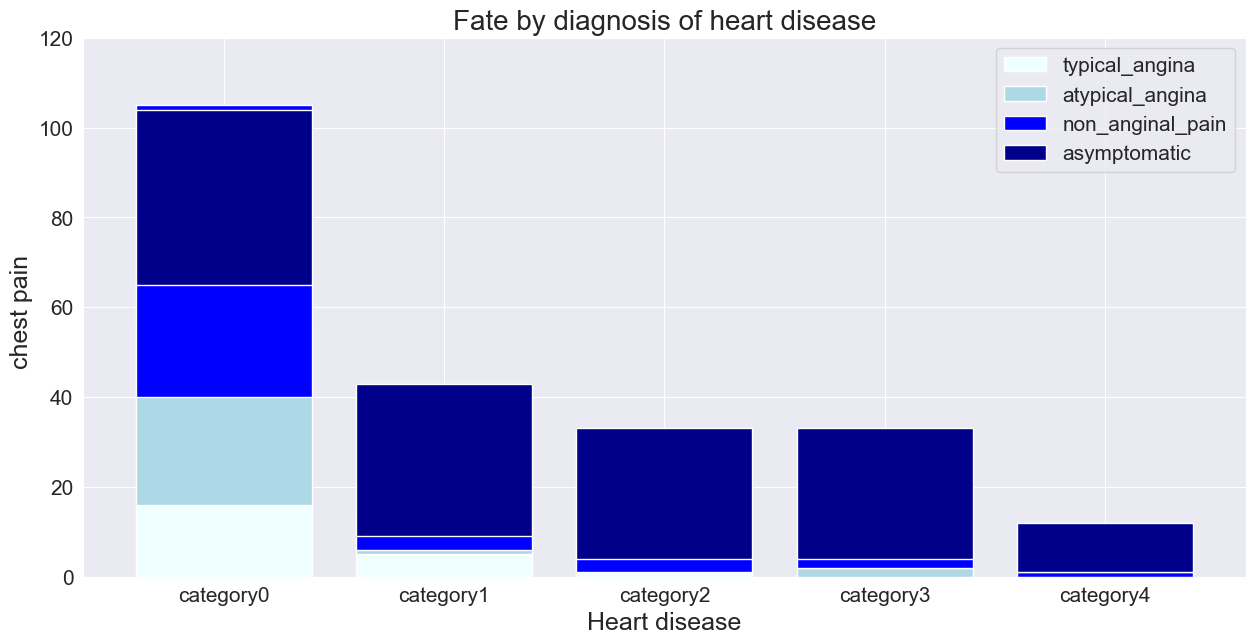

In [29]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
typical_angina = (16,5,1,0,1)
atypical_angina = (40,6,1,2,0 )
non_anginal_pain = (65,9,4,4,1)
asymptomatic = (39,34,29,29,11)

p1 = plt.bar(np.arange(5), typical_angina,color='azure')
p2 = plt.bar(np.arange(5), atypical_angina,color='lightblue', bottom=typical_angina)
p3 = plt.bar(np.arange(5), non_anginal_pain,color='blue', bottom=atypical_angina)
p4 = plt.bar(np.arange(5), asymptomatic,color='darkblue', bottom=non_anginal_pain)

plt.xlabel('Heart disease',fontsize=18)
plt.ylabel('chest pain ',fontsize=18)

plt.title('Fate by diagnosis of heart disease',fontsize=20)
plt.xticks(np.arange(5) , ('category0', 'category1', 'category2', 'category3', 'category4'),fontsize=15)
plt.yticks(np.arange(0, 130, 20),fontsize=15)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('typical_angina','atypical_angina','non_anginal_pain', 'asymptomatic'),fontsize=15)

plt.show()

The highest persentage is 'value 0: < 50% diameter narrowing' in diagnosis of heart disease that main peaple are okay.
The lowest persentage is 'value 4 : > 50% diameter narrowing is 13' in diagnosis of heart disease.
The highest persentage is 'value 4: asymptomatic is 39' in chest pain.
The lowest persentage is 'value 1: typical angina is 16' in chest pain.

### Correlation between variables

C:\Users\sweth\AppData\Local\Temp\ipykernel_22136\2134988852.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = heart_data.corr()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'cp'),
  Text(0, 3.5, 'trtbps'),
  Text(0, 4.5, 'chol'),
  Text(0, 5.5, 'fbs'),
  Text(0, 6.5, 'restecg'),
  Text(0, 7.5, 'thalachh'),
  Text(0, 8.5, 'exng'),
  Text(0, 9.5, 'oldpeak'),
  Text(0, 10.5, 'slp'),
  Text(0, 11.5, 'caa'),
  Text(0, 12.5, 'thall'),
  Text(0, 13.5, 'num')])

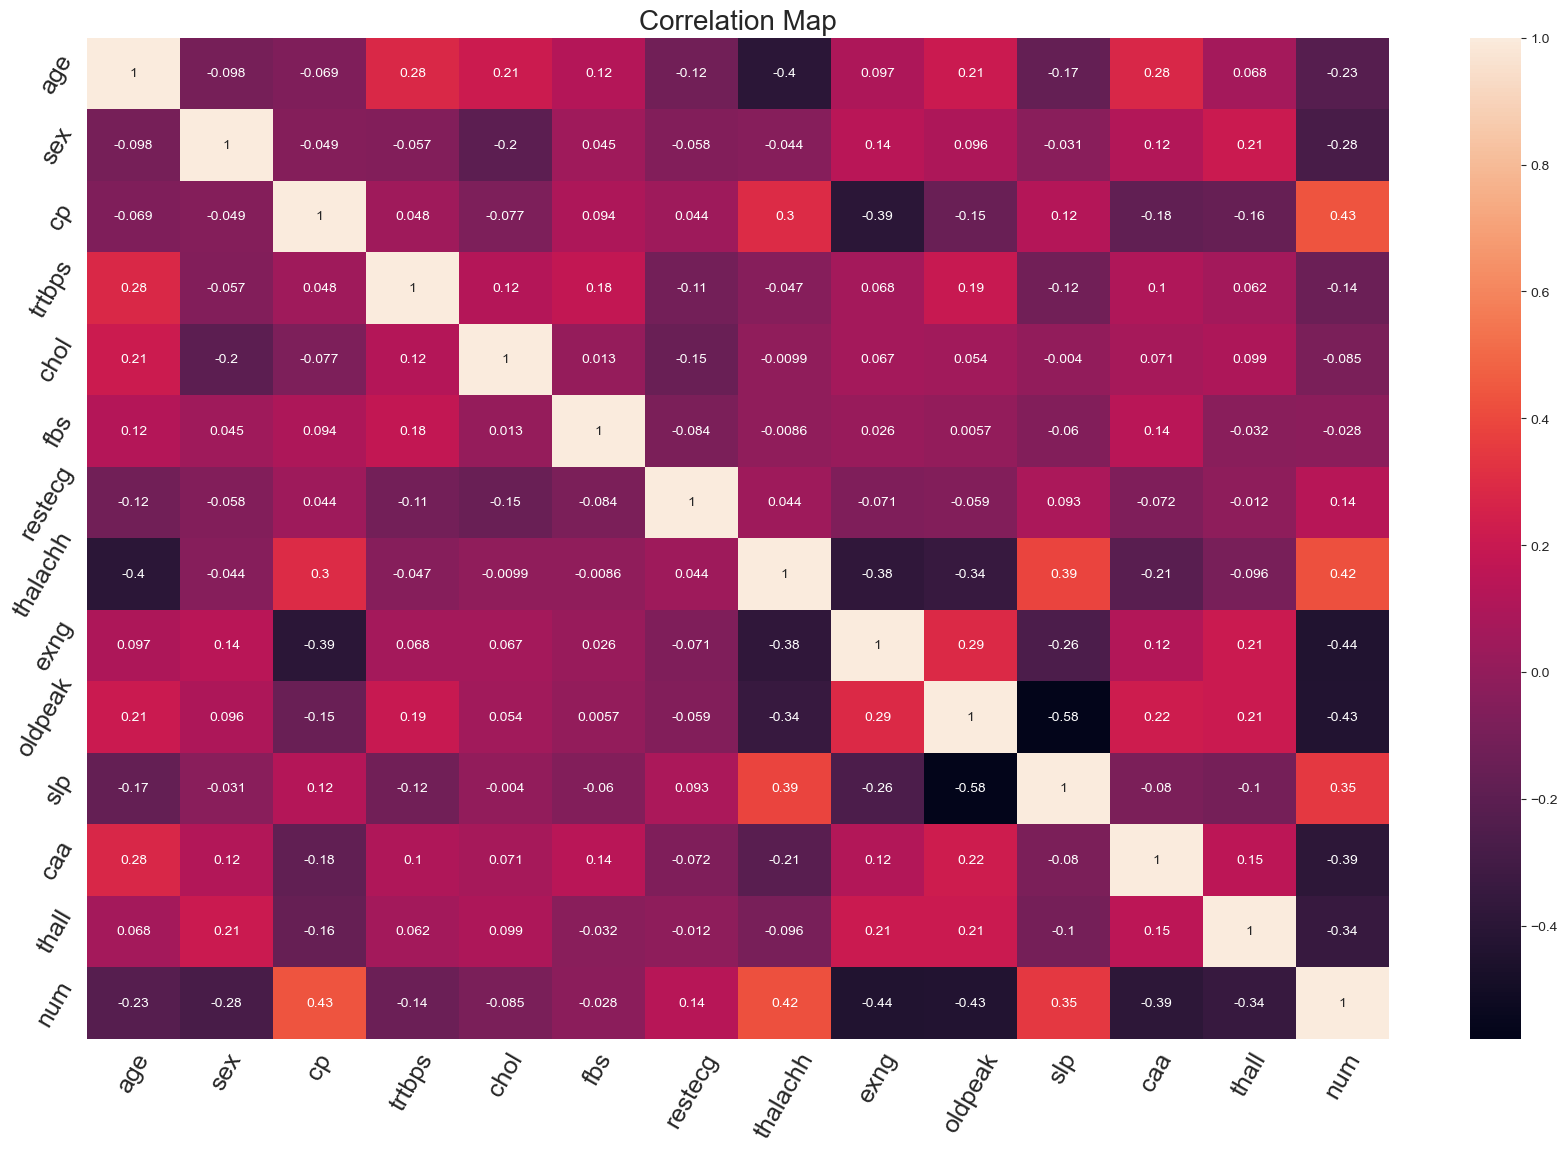

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(21,13))
corr = heart_data.corr()
plt.title('Correlation Map',fontsize=20)
sns.heatmap(corr,annot=True,linecolor='Black')
plt.xticks(fontsize=18,rotation = 60)
plt.yticks(fontsize=18,rotation = 60)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'cp'),
  Text(0, 3.5, 'trestbps'),
  Text(0, 4.5, 'chol'),
  Text(0, 5.5, 'fbs'),
  Text(0, 6.5, 'restecg'),
  Text(0, 7.5, 'thalach'),
  Text(0, 8.5, 'exang'),
  Text(0, 9.5, 'oldpeak'),
  Text(0, 10.5, 'slope'),
  Text(0, 11.5, 'ca'),
  Text(0, 12.5, 'thal'),
  Text(0, 13.5, 'num')])

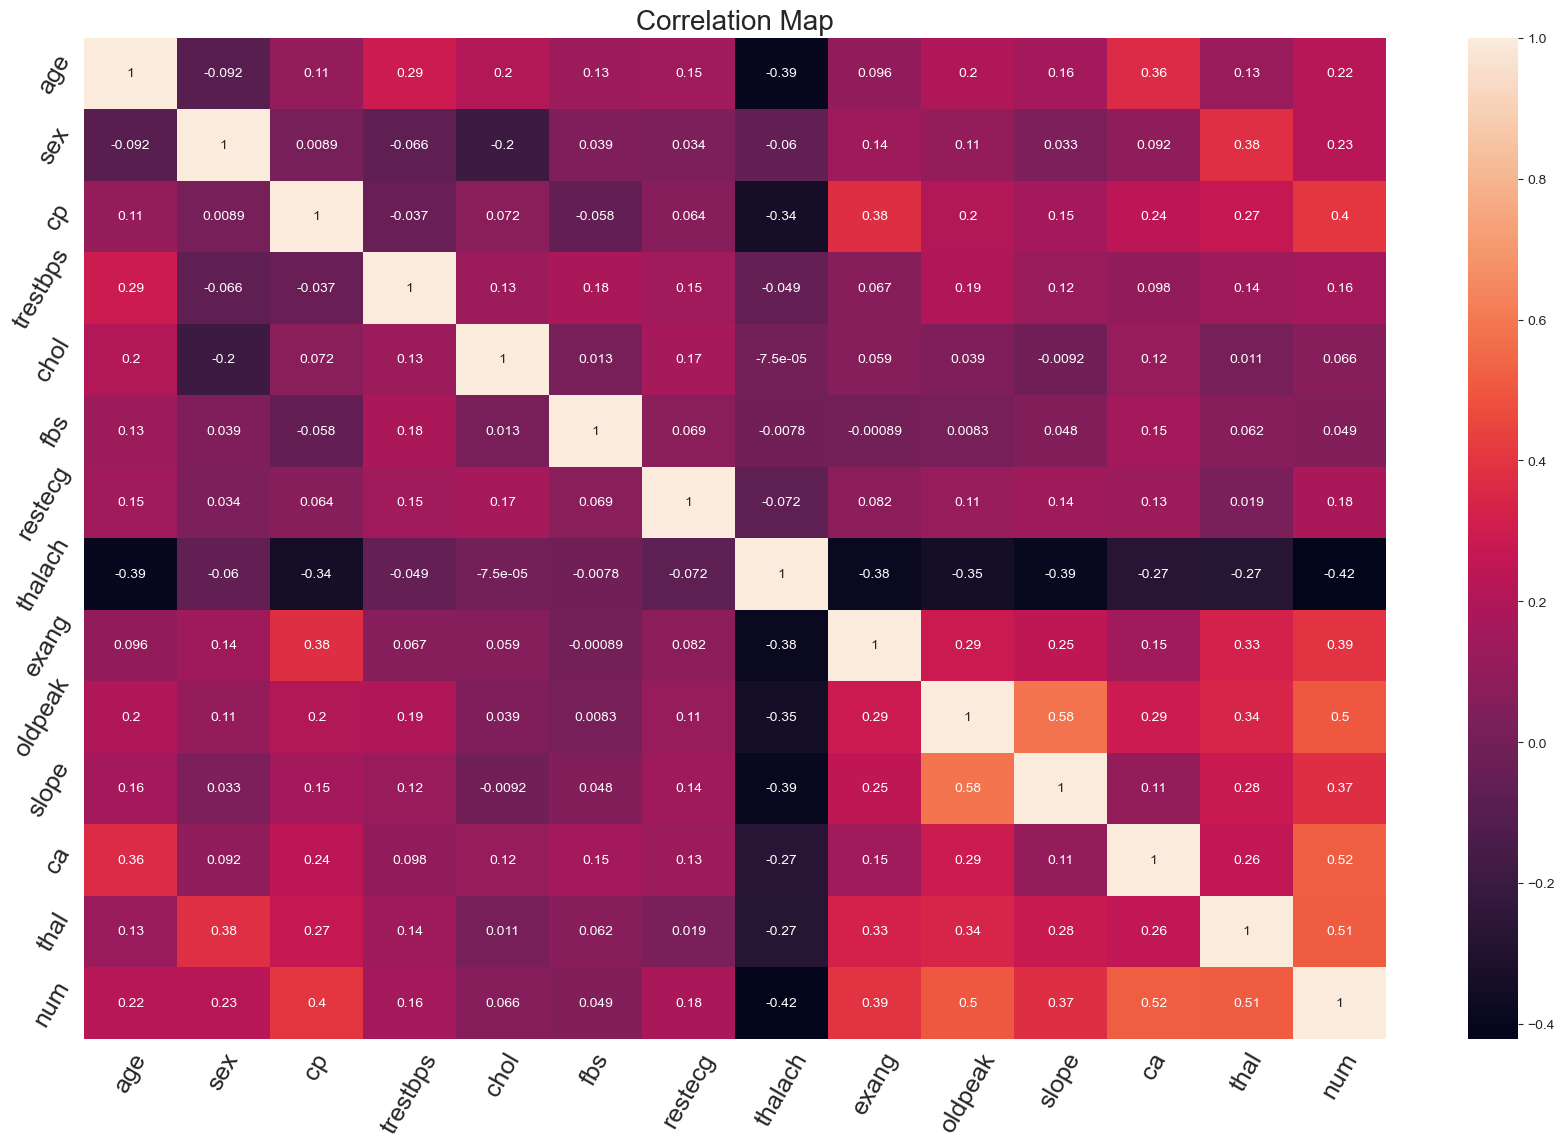

In [31]:
plt.figure(figsize=(21,13))
corr = heart_data_new.corr()
plt.title('Correlation Map',fontsize=20)
sns.heatmap(corr,annot=True,linecolor='Black')
plt.xticks(fontsize=18,rotation = 60)
plt.yticks(fontsize=18,rotation = 60)

The most feature doesn't have correlation with other features is thalach,
The most feature have correlation with other features is num
slope and oldpeak are highly correlated 0.58.

In [32]:
new_data=heart_data.drop(['level_of_age'], axis=1)

In [33]:
x = new_data.drop(['num'], axis=1)
y = new_data['num']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [35]:
X= heart_data_new.drop(['num'], axis=1)
Y= heart_data_new['num']

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [37]:
x_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [38]:
x_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


## Machine Learning Modelling

### Random Forest

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train)
sc.transform(x_test)

array([[ 1.69716475,  0.69617712, -0.92274852,  0.77251645, -1.36354075,
        -0.41803981,  0.90163913, -1.07375268,  1.40984195,  1.2900049 ,
        -2.27916533, -0.70710678,  1.14190596],
       [ 1.02496529,  0.69617712,  1.94013791,  2.23625729, -0.3703119 ,
        -0.41803981, -0.97936664,  0.22375805, -0.70929937, -0.38883987,
        -0.66169316, -0.70710678,  1.14190596],
       [ 0.46479907,  0.69617712,  1.94013791,  2.23625729,  0.7728383 ,
        -0.41803981, -0.97936664,  0.39675948, -0.70929937, -0.72460883,
        -0.66169316, -0.70710678,  1.14190596],
       [ 0.57683232,  0.69617712, -0.92274852, -0.39847623,  0.21063328,
        -0.41803981, -0.97936664, -0.38174696,  1.40984195,  1.45788938,
        -0.66169316,  0.26516504,  1.14190596],
       [ 0.8008988 ,  0.69617712,  0.98584243, -0.10572806, -0.29535123,
        -0.41803981,  0.90163913, -0.16549517, -0.70929937,  0.61846699,
        -0.66169316,  2.20970869,  1.14190596],
       [-0.7675666 ,  0.696177

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [41]:
model1 = RandomForestClassifier(n_estimators=300,criterion="gini",random_state=5,max_depth=100)
model1.fit(x_train,y_train)
prediction_rf = model1.predict(x_test)
accuracy_score(prediction_rf,y_test)*100

83.60655737704919

In [42]:
from sklearn.metrics import  accuracy_score, classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve
print ("Accuracy: " + str(accuracy_score (y_test, prediction_rf)))
print ("Precision: " + str(precision_score (y_test, prediction_rf)))
print ("Recall: " + str(recall_score (y_test, prediction_rf)))
print ("F1: " + str(f1_score (y_test, prediction_rf)))

Accuracy: 0.8360655737704918
Precision: 0.8529411764705882
Recall: 0.8529411764705882
F1: 0.8529411764705882


### CatBoost Classifier

In [43]:
!pip install catboost
from catboost import CatBoostClassifier


In [44]:
model2=CatBoostClassifier()
model2.fit(x_train,y_train)
prediction_cat = model2.predict(x_test)
model2_acc = accuracy_score(y_test, prediction_cat)*100
model2_acc

Learning rate set to 0.005621
0:	learn: 0.6886471	total: 146ms	remaining: 2m 26s
1:	learn: 0.6847679	total: 154ms	remaining: 1m 17s
2:	learn: 0.6801607	total: 161ms	remaining: 53.4s
3:	learn: 0.6756190	total: 166ms	remaining: 41.3s
4:	learn: 0.6717402	total: 171ms	remaining: 34.1s
5:	learn: 0.6676141	total: 176ms	remaining: 29.2s
6:	learn: 0.6644798	total: 182ms	remaining: 25.8s
7:	learn: 0.6606557	total: 188ms	remaining: 23.3s
8:	learn: 0.6563533	total: 194ms	remaining: 21.4s
9:	learn: 0.6524653	total: 199ms	remaining: 19.7s
10:	learn: 0.6492070	total: 204ms	remaining: 18.3s
11:	learn: 0.6446129	total: 209ms	remaining: 17.2s
12:	learn: 0.6416530	total: 213ms	remaining: 16.2s
13:	learn: 0.6372666	total: 218ms	remaining: 15.4s
14:	learn: 0.6337783	total: 223ms	remaining: 14.6s
15:	learn: 0.6302333	total: 228ms	remaining: 14s
16:	learn: 0.6260600	total: 233ms	remaining: 13.5s
17:	learn: 0.6224034	total: 238ms	remaining: 13s
18:	learn: 0.6187773	total: 243ms	remaining: 12.5s
19:	learn: 0.

83.60655737704919

In [45]:
print ("Accuracy: " + str(accuracy_score (y_test, prediction_cat)))
print ("Precision: " + str(precision_score (y_test, prediction_cat)))
print ("Recall: " + str(recall_score (y_test, prediction_cat)))
print ("F1: " + str(f1_score (y_test, prediction_cat)))

Accuracy: 0.8360655737704918
Precision: 0.8529411764705882
Recall: 0.8529411764705882
F1: 0.8529411764705882


### AdaBoost Classifier

In [46]:

from sklearn.ensemble import AdaBoostClassifier

In [47]:
model3=AdaBoostClassifier()
model3.fit(x_train,y_train)
prediction_ada = model3.predict(x_test)
model3_acc = accuracy_score(y_test, prediction_ada)*100
model3_acc

90.1639344262295

## COMPARING THE BEST MODEL WITH SECOND DATA SET

In [48]:
model3=AdaBoostClassifier()
model3.fit(X_train,Y_train)
prediction_ada_1 = model3.predict(X_test)
model3_acc = accuracy_score(Y_test, prediction_ada_1)*100
model3_acc

48.333333333333336

In [49]:
print ("Accuracy: " + str(accuracy_score (y_test, prediction_ada)))
print ("Precision: " + str(precision_score (y_test, prediction_ada)))
print ("Recall: " + str(recall_score (y_test, prediction_ada)))
print ("F1: " + str(f1_score (y_test, prediction_ada)))

Accuracy: 0.9016393442622951
Precision: 0.9375
Recall: 0.8823529411764706
F1: 0.9090909090909091


## COMPARING THE METRICES

In [50]:
print ("Accuracy: " + str(accuracy_score (Y_test, prediction_ada_1)))
print ("Precision: " + str(precision_score (Y_test, prediction_ada_1,average='micro')))
print ("Recall: " + str(recall_score (Y_test, prediction_ada_1,average='micro')))
print ("F1: " + str(f1_score (Y_test, prediction_ada_1,average='micro')))

Accuracy: 0.48333333333333334
Precision: 0.48333333333333334
Recall: 0.48333333333333334
F1: 0.48333333333333334


### Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
model4=GradientBoostingClassifier()
model4.fit(x_train,y_train)
prediction_grad = model4.predict(x_test)
model4_acc = accuracy_score(y_test, prediction_grad)*100
model4_acc

80.32786885245902

In [53]:
print ("Accuracy: " + str(accuracy_score (y_test, prediction_grad)))
print ("Precision: " + str(precision_score (y_test, prediction_grad)))
print ("Recall: " + str(recall_score (y_test, prediction_grad)))
print ("F1: " + str(f1_score (y_test, prediction_grad)))

Accuracy: 0.8032786885245902
Precision: 0.8235294117647058
Recall: 0.8235294117647058
F1: 0.8235294117647058


### Gaussian NB

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
model5 = GaussianNB()
model5.fit(x_train,y_train)
prediction_gaus = model5.predict(x_test)
model5_acc = accuracy_score(y_test, prediction_gaus)*100
model5_acc

85.24590163934425

In [56]:
print ("Accuracy: " + str(accuracy_score (y_test, prediction_gaus)))
print ("Precision: " + str(precision_score (y_test, prediction_gaus)))
print ("Recall: " + str(recall_score (y_test, prediction_gaus)))
print ("F1: " + str(f1_score (y_test, prediction_gaus)))

Accuracy: 0.8524590163934426
Precision: 0.8378378378378378
Recall: 0.9117647058823529
F1: 0.8732394366197184
